In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

from random import randint
from random import choice

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.cluster import KMeans
from skimage.transform import radon

In [74]:
def visualize(img) -> "draws the image" :
    plt.imshow(img, cmap=cm.gray)

In [75]:

def single_square_data_generator(side_size : "size of the square's side",
                                     ) -> " (x,y) tuple " :


    img=np.zeros((side_size,side_size)) # create an empty image
    square_size = randint(3,side_size-3) # generate a random size of a square side
    x = randint(1,64-square_size-1) # left starting point
    y = randint(1,64-square_size-1) # up starting point
    
    # We got starting point and size of square, now, draw it ! :
    
    for i in range(square_size) : 
        for j in range(square_size) : 
            img[x+i,y+j] = 1 
    
    
    sinogram = radon(img) # sinogram transformation from skimage.transform library [ sinogram transf is called radon transform]
    return (sinogram, img)



def square_data_generator(n : "number of data to be generated",
                          side_size : "size of the square's side",
                          ) -> " (x,y) where x - list of sinograms, y - list of corresponding images" :

    x, y = [], []    
    for _ in range(n):
        sinogram, img = single_square_data_generator(side_size)
        x.append(sinogram)
        y.append(img)
        
    x = np.array(x)
    y = np.array(y)
    
    
    
    #### To make it fit the NN we need to transform these to tensors, change their dimensions, and cast into double [float32]
    
    x = torch.from_numpy(x)
    x = x.view(-1,1,64,180)
    x = x.to(dtype=torch.float32)
    
    
    #### Do we need to convert y to tensor as well? Probs yes so we use GPU to calculate Cross Entropy loss ?

    return (x,y)

In [131]:
sinogram, img = square_data_generator(1,64)

sinogram.shape : torch.Size([64, 180])


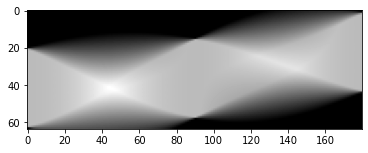

In [132]:
sinogram = sinogram[0,0] 
print("sinogram.shape : {}".format(sinogram.shape))
visualize(sinogram)

img.shape : (64, 64)


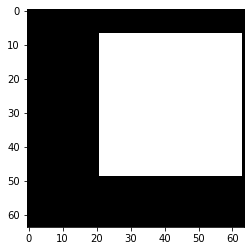

In [133]:
img = img[0]
print("img.shape : {}".format(img.shape))
visualize(img)

## Reconstructing from 2 angles : 

In [134]:
def reconstruct_from_2_right_angles(sinogram):
    angle_0 = sinogram[:,0]
    angle_90 = sinogram[:,90]
    
    angle_90 = angle_90.view(-1,1).numpy()
    angle_0 = angle_0.view(1,-1).numpy()
    
    angle_90 = np.flip(angle_90)
    #angle_0 = np.flip(angle_0)
    
    reconstructed = (angle_0 + angle_90)
    visualize(reconstructed)

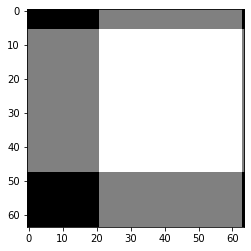

In [135]:
reconstruct_from_2_right_angles(sinogram)

## Define reconstructing algorithm 


Define an algorithm that reconstructs from : 

x amount of angles 
Uses the 2 info about a projection : it's angle, and it's array of values 

In [ ]:
def reconstruct(projections, # Projections should be a dict in form : {angle : [array of values]}
                size = 64, #size of a image
                sq_size  # Perhaps some additional info ?? Just an idea, don't implement yet
               ) -> "Outputs a reconstructed image" :
    
    
    reconstructed_img = np.zeros((size,size))
    
    
    # Iterate over all of our information  :
    
    for x, y in projections.items():
        add_info(reconstructed_img, x, y) # x - angle_nr, y - list 
    
    
    
    
    
def add_info(img, # Input image
             x,   # The angle number 
             y,   # The sinogram angle's list 
            ) -> "updated img" : 
    
    # Step 1 - Rotate the image ?
    
    # Step 2 - Update using the array values
    
    
    
    
    
    